In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder , PowerTransformer
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report

In [177]:
df = pd.read_csv(r'D:\git\rain prediction\usa_rain_prediction_dataset_2024_2025.csv')
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [178]:
df.shape

(73100, 9)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [180]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [181]:
df['Rain Tomorrow'].value_counts()

Rain Tomorrow
0    56988
1    16112
Name: count, dtype: int64

In [182]:
majority = df[df['Rain Tomorrow'] == 0]
minority = df[df['Rain Tomorrow'] == 1]

majority_down = majority.sample(n=len(minority), random_state=42)

df = pd.concat([majority_down, minority], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
df['Rain Tomorrow'].value_counts()


Rain Tomorrow
1    16112
0    16112
Name: count, dtype: int64

In [183]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Year,Month,Day
0,2025-04-20,Chicago,69.114464,94.336506,14.026524,1.421033,13.203948,1033.701421,1,2025,4,20
1,2024-09-28,Los Angeles,80.202464,45.041409,11.080747,0.000000,49.547218,983.478080,0,2024,9,28
2,2025-07-26,Philadelphia,46.626643,24.775694,11.757177,0.061948,75.530714,1028.901861,0,2025,7,26
3,2024-02-14,Denver,56.630639,66.178606,4.251553,0.000000,27.871849,1003.737620,0,2024,2,14
4,2024-01-03,Houston,54.163279,44.200459,7.831794,0.000000,73.597055,1006.908998,0,2024,1,3


In [184]:
encoder = LabelEncoder()
df['loc_num'] = encoder.fit_transform(df['Location'])
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Year,Month,Day,loc_num
0,2025-04-20,Chicago,69.114464,94.336506,14.026524,1.421033,13.203948,1033.701421,1,2025,4,20,2
1,2024-09-28,Los Angeles,80.202464,45.041409,11.080747,0.000000,49.547218,983.478080,0,2024,9,28,10
2,2025-07-26,Philadelphia,46.626643,24.775694,11.757177,0.061948,75.530714,1028.901861,0,2025,7,26,12
3,2024-02-14,Denver,56.630639,66.178606,4.251553,0.000000,27.871849,1003.737620,0,2024,2,14,5
4,2024-01-03,Houston,54.163279,44.200459,7.831794,0.000000,73.597055,1006.908998,0,2024,1,3,7


In [185]:
display(df[['Location', 'loc_num']].drop_duplicates().sort_values('loc_num'))

,Location,loc_num
74,Austin,0
16,Charlotte,1
0,Chicago,2
14,Columbus,3
19,Dallas,4
3,Denver,5
36,Fort Worth,6
4,Houston,7
5,Indianapolis,8
10,Jacksonville,9


In [186]:
df.skew(numeric_only=True)

Temperature     -0.002412
Humidity        -0.463260
Wind Speed       0.000364
Precipitation    0.775059
Cloud Cover      0.010840
Pressure        -0.012808
Rain Tomorrow    0.000000
Year            -0.001490
Month           -0.005917
Day              0.005234
loc_num         -0.000717
dtype: float64

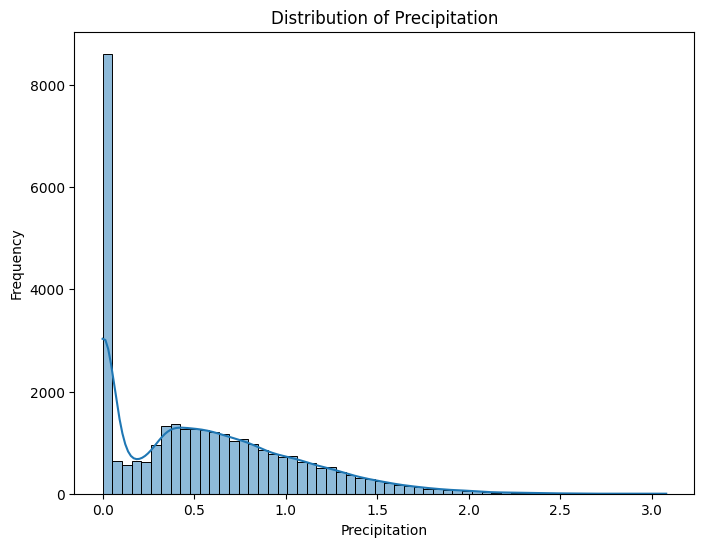

In [187]:
plt.figure(figsize = (8,6))
sns.histplot(df['Precipitation'],kde = True)
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation')
plt.show()

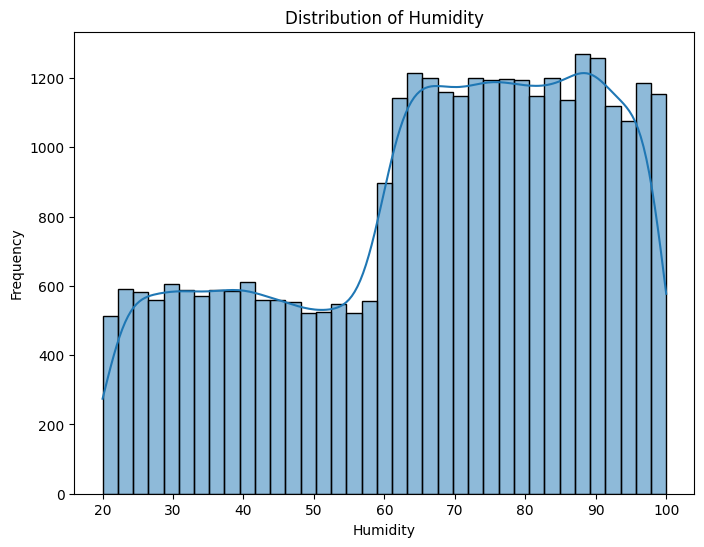

In [188]:
plt.figure(figsize = (8,6))
sns.histplot(df['Humidity'],kde = True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity')
plt.show()

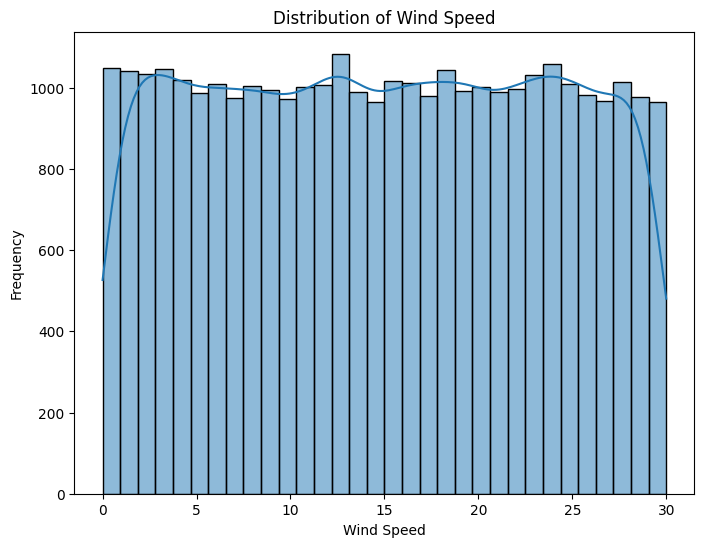

In [189]:
plt.figure(figsize = (8,6))
sns.histplot(df['Wind Speed'],kde = True)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')
plt.show()

In [190]:
pt = PowerTransformer(method='yeo-johnson')
df['Precipitation'] = np.cbrt(df['Precipitation'])
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Year,Month,Day,loc_num
0,2025-04-20,Chicago,69.114464,94.336506,14.026524,1.124263,13.203948,1033.701421,1,2025,4,20,2
1,2024-09-28,Los Angeles,80.202464,45.041409,11.080747,0.000000,49.547218,983.478080,0,2024,9,28,10
2,2025-07-26,Philadelphia,46.626643,24.775694,11.757177,0.395679,75.530714,1028.901861,0,2025,7,26,12
3,2024-02-14,Denver,56.630639,66.178606,4.251553,0.000000,27.871849,1003.737620,0,2024,2,14,5
4,2024-01-03,Houston,54.163279,44.200459,7.831794,0.000000,73.597055,1006.908998,0,2024,1,3,7


In [191]:
df.skew(numeric_only=True)

Temperature     -0.002412
Humidity        -0.463260
Wind Speed       0.000364
Precipitation   -0.616344
Cloud Cover      0.010840
Pressure        -0.012808
Rain Tomorrow    0.000000
Year            -0.001490
Month           -0.005917
Day              0.005234
loc_num         -0.000717
dtype: float64

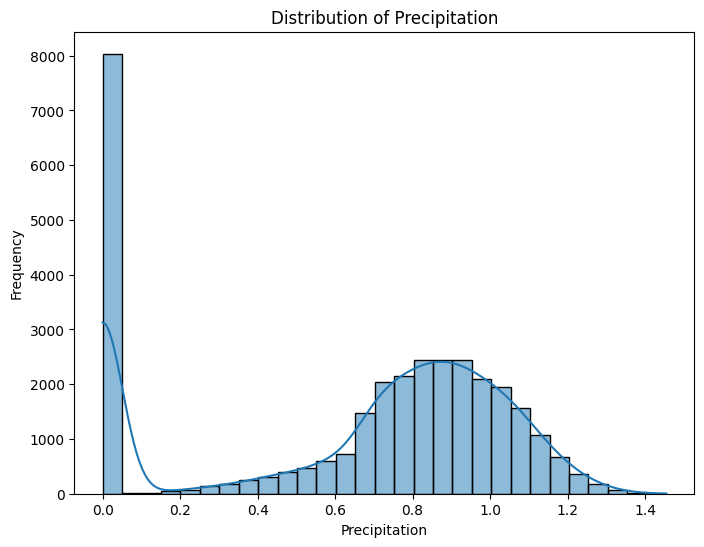

In [192]:
plt.figure(figsize = (8,6))
sns.histplot(df['Precipitation'],kde = True)
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation')
plt.show()

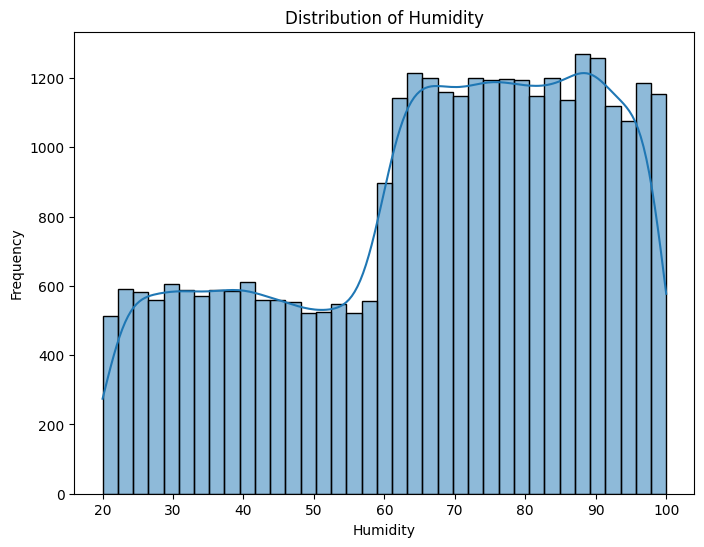

In [193]:
plt.figure(figsize = (8,6))
sns.histplot(df['Humidity'],kde = True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity')
plt.show()

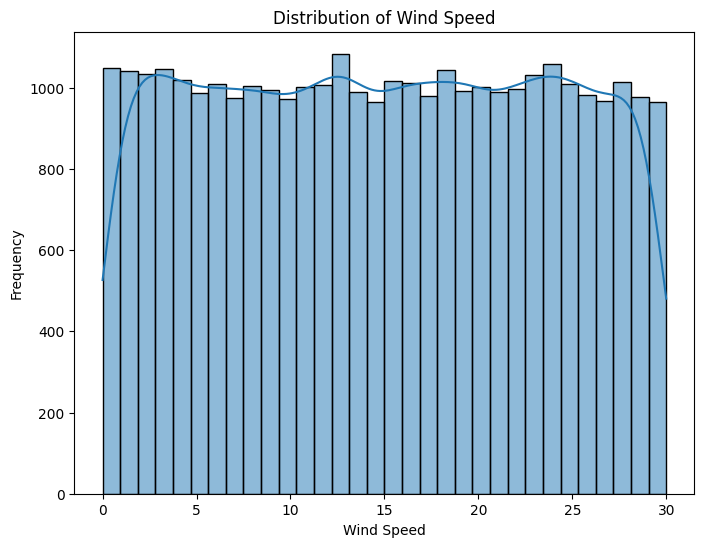

In [194]:
plt.figure(figsize = (8,6))
sns.histplot(df['Wind Speed'],kde = True)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')
plt.show()

In [195]:
x = df.drop(['Date','Location','Rain Tomorrow'],axis = 1)
y = df['Rain Tomorrow']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [196]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [197]:
confussion_matrix_clf = confusion_matrix(y_test,y_pred)
print(confussion_matrix_clf)
classification_report_clf = classification_report(y_test,y_pred)
print(classification_report_clf)

[[3310    0]
 [   0 3135]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3310
           1       1.00      1.00      1.00      3135

    accuracy                           1.00      6445
   macro avg       1.00      1.00      1.00      6445
weighted avg       1.00      1.00      1.00      6445



In [198]:
X = df.drop(['Date','Location','Rain Tomorrow'],axis = 1)
Y = df['Rain Tomorrow']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [199]:
nb = BernoulliNB()

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'binarize': [0.0, 0.5, 1.0]
}

grid = GridSearchCV(estimator = nb, param_grid = param_grid , cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Y_pred = grid.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

Best Parameters: {'alpha': 0.1, 'binarize': 0.5}
0.7833979829325058


In [200]:
confusion_matrix_nb = confusion_matrix(Y_test,Y_pred)
print(confusion_matrix_nb)
classification_report_nb = classification_report(Y_test,Y_pred)
print(classification_report_nb)

[[1914 1396]
 [   0 3135]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73      3310
           1       0.69      1.00      0.82      3135

    accuracy                           0.78      6445
   macro avg       0.85      0.79      0.78      6445
weighted avg       0.85      0.78      0.77      6445



In [201]:
import pickle
with open('rain_prediction_model.pkl', 'wb') as f:
    pickle.dump(grid, f)